# Импорты

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import FeatureHasher

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Предобработка и анализ данных

## Предобработка датасетов

### ga_sessions

In [3]:
df = pd.read_csv("/content/drive/MyDrive/МФТИ/Hackathon_05.2025/Data/ga_sessions.csv", low_memory=False)

In [4]:
df.shape

(1860042, 18)

In [5]:
df.head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [6]:
print(df.duplicated().any())

False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
df.describe()

,visit_number
count,1860042.00
mean,2.71
std,11.83
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,564.00


In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
device_model,1843704
utm_keyword,1082061
device_os,1070138
device_brand,367178
utm_adcontent,335615
utm_campaign,219603
utm_source,97
session_id,0
client_id,0
visit_number,0


In [11]:
df['device_model'].value_counts()

,count
device_model,
AuMdmADEIoPXiWpTsBEj,9778
tWBQlsvNfHxRUjaPAfhd,653
cwMJxNXiWUgMUxGiCTPs,651
pTgAEPipQxDXCjPrJbHo,461
FJApgTrMAGHoxCxQVKws,372
...,...
UvyzWsKbojrmlVrFRIgp,1
MbollXMuOxfwxhQmvVNl,1
mhkBNBhsTwAvDUZdstnC,1


In [12]:
df['utm_keyword'].value_counts()

,count
utm_keyword,
puhZPIYqKXeFPaUviSjo,506819
aXQzDWsJuGXeBXexNHjc,24241
pHqgLcdBQPSLcrTpLkdr,13767
ITfrGJNwVsHBGJMAKoct,13353
hAmNSZmQkKQKAjZEGlgb,11297
...,...
ziplOmogOIgMoedLNvaR,1
hIlpdXTVGwzYWIOqvhtN,1
DWdObWJnYkxegWsWkVuy,1


In [13]:
df['device_os'].value_counts()

,count
device_os,
Android,464054
iOS,207104
Windows,88307
Macintosh,24824
Linux,5120
(not set),364
Chrome OS,83
BlackBerry,27
Tizen,7


In [14]:
df['device_brand'].value_counts()

,count
device_brand,
Apple,551088
Samsung,332194
Xiaomi,288367
Huawei,185853
Realme,19058
...,...
Maze,1
Tagital,1
FREETEL,1


In [15]:
df['utm_adcontent'].value_counts()

,count
utm_adcontent,
JNHcPlZPxEMWDnRiyoBf,1006599
vCIpmpaGBnIQhyYNkXqp,181048
xhoenQgDQsgfEPYNPwKO,113072
PkybGvWbaqORmxjNunqZ,60316
LLfCasrxQzJIyuldcuWy,24222
...,...
vxMugcyrQNIxwvOkqILt,1
cQRpDybanXRyHUvzJmgo,1
wDodCPywICvJWGwjXgTp,1


In [16]:
df['utm_campaign'].value_counts()

,count
utm_campaign,
LTuZkdKfxRGVceoWkVyg,463481
LEoPHuyFvzoNfnzGgfcd,324044
FTjNLDyTrXaWYgZymFkV,247360
gecBYcKZCPMcVYdSSzKP,134042
TmThBvoCcwkCZZUWACYq,26597
...,...
zXjuoqEaPElBnwpSHMpx,1
cqgnjDbqrtCipVvzhxqa,1
AdtHYglxfCpTpwZeTAuW,1


In [17]:
df['utm_source'].value_counts()

,count
utm_source,
ZpYIoDJMcFzVoPFsHGJL,578290
fDLlAcSmythWSCVMvqvL,300575
kjsLglQLzykiRbcDiGcD,266354
MvfHsxITijuriZxsqZqt,186199
BHcvLfOaCWvWTykYqHVe,116320
...,...
bZGRDuESNKqbvzmxXlpf,1
jCIRaffxlokbeWIRXHKg,1
tasNSXvMCFllwbrJviyg,1


In [18]:
df.nunique().sort_values()

,0
device_category,3
device_os,13
utm_medium,56
device_browser,57
device_model,104
geo_country,166
device_brand,205
visit_date,226
utm_adcontent,286
utm_source,293


#### Изменения

In [19]:
# (object) date + time --> datetime
df['datetime'] = pd.to_datetime(df['visit_date'] + ' ' + df['visit_time'])
df.drop(['visit_date', 'visit_time'], axis=1, inplace=True)

In [20]:
# (удалить) весь device_model
df.drop("device_model", axis=1, inplace=True)

In [21]:
# (удалить) из utm_source
df.dropna(subset=['utm_source'], inplace=True)

In [22]:
# (заменить) NaN в 'utm_keyword', 'device_os', 'device_brand', 'utm_adcontent', 'utm_campaign' на 'unknown'
cols = ['utm_keyword', 'device_os', 'device_brand', 'utm_adcontent', 'utm_campaign']
df[cols] = df[cols].fillna('unknown')

In [23]:
# (перевести) в category
cols = ['device_category',
        'device_os',
        'utm_medium',
        'device_browser',
        'geo_country',
        'device_brand',
        'utm_source',
        'utm_campaign',
        'utm_adcontent']
df[cols] = df[cols].astype('category')

#### После изменений

In [24]:
df.isnull().sum().sort_values(ascending=False)

,0
session_id,0
client_id,0
visit_number,0
utm_source,0
utm_medium,0
utm_campaign,0
utm_adcontent,0
utm_keyword,0
device_category,0
device_os,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859945 entries, 0 to 1860041
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_number              int64         
 3   utm_source                category      
 4   utm_medium                category      
 5   utm_campaign              category      
 6   utm_adcontent             category      
 7   utm_keyword               object        
 8   device_category           category      
 9   device_os                 category      
 10  device_brand              category      
 11  device_screen_resolution  object        
 12  device_browser            category      
 13  geo_country               category      
 14  geo_city                  object        
 15  datetime                  datetime64[ns]
dtypes: category(9), datetime64[ns](1), int64(1), object(5)
memo

In [26]:
df.head(5)

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,datetime
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,2021-11-24 14:36:32
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,2021-11-14 08:21:30
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28 02:42:06
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,unknown,mobile,unknown,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29 05:00:00
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,unknown,mobile,unknown,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29 05:00:00


#### Выводы:
- Дубли: нет
- Пропуски: было 7 признаков с пропусками: device_model, utm_keyword, device_os, device_brand, utm_adcontent, utm_campaign, utm_source.
- Память: 255.4 MB --> 138.4 MB

#### Идеи:
- Сделать группирующее значение для редких значений (например, если < top100)

### ga_hits

In [27]:
dff = pd.read_csv("/content/drive/MyDrive/МФТИ/Hackathon_05.2025/Data/ga_hits.csv", low_memory=False)

In [28]:
dff.shape

(15726470, 11)

In [29]:
dff.head(5)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.00,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.00,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.00,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.00,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.00,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [30]:
print(dff.duplicated().any())

False


In [31]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [32]:
dff.describe()

,hit_time,hit_number,event_value
count,6566148.00,15726470.00,0.00
mean,209104.99,23.57,NaN
std,403210.97,28.88,NaN
min,0.00,1.00,NaN
25%,24120.00,7.00,NaN
50%,89941.00,15.00,NaN
75%,219535.25,29.00,NaN
max,13156885.00,500.00,NaN


In [33]:
dff.isnull().sum().sort_values(ascending=False)

,0
event_value,15726470
hit_time,9160322
hit_referer,6274804
event_label,3760184
session_id,0
hit_date,0
hit_number,0
hit_page_path,0
hit_type,0
event_action,0


In [34]:
dff['event_value'].value_counts()

,count
event_value,


In [35]:
dff['hit_time'].value_counts()

,count
hit_time,
0.00,41137
1.00,18522
2.00,10101
3.00,6060
4.00,4478
...,...
763295.00,1
751547.00,1
358806.00,1


In [36]:
dff['hit_referer'].value_counts()

,count
hit_referer,
HbolMJUevblAbkHClEQa,8879187
FwdMTcXzWAwhtsnMAbhS,91940
sAGDBCdeVPmQPwkVEcIX,53565
GQmOLxANuSeCxCanBpMl,35470
ZeRnFrHdnMmnqraghdGJ,23016
...,...
nabaInLgFceAmcjHtLhZ,1
STOWpoKSjKHUmLOOUUkl,1
kyNAtgvDjQLlGlQkFtcv,1


In [37]:
dff['event_label'].value_counts()

,count
event_label,
KclpemfoHstknWHFiLit,6505447
hAHqGICPFQiPwtzubOzs,1284914
OHfyUfDKdPgBdvelDlfG,626554
pzAKUYdRKNEUXxxBFUPX,358915
ghOrjqpgskpGHSFfBBsi,342500
...,...
GGXpuNtWoMrEzgNskyxd,1
AylbdsgJvNWIYZtbekhW,1
jFAFMjEAJifgmQmkbZoE,1


In [38]:
dff.nunique().sort_values()

,0
event_value,0
hit_type,1
event_category,52
hit_date,226
event_action,230
hit_number,500
hit_referer,37873
event_label,39825
hit_page_path,342715
hit_time,925887


#### Изменения

In [39]:
# (object) date + time --> datetime
dff['hit_date'] = pd.to_datetime(dff['hit_date'])

In [40]:
# (заменить) NaN в 'hit_referer', 'event_label' на 'unknown'
cols = ['hit_referer', 'event_label']
dff[cols] = dff[cols].fillna('unknown')

In [41]:
# (перевести) в category
cols = ['event_action', 'event_category']
dff[cols] = dff[cols].astype('category')

In [42]:
# (заменить) NaN в hit_time на 0 при условии hit_number == 1
dff.loc[(dff['hit_number'] == 1) & (dff['hit_time'].isna()), 'hit_time'] = 0.0

In [43]:
# (заменить) NaN в hit_time на медиану для номеров hit_number
mediana = dff.groupby('hit_number')['hit_time'].median()
dff['median_hit_time'] = dff['hit_number'].map(mediana)
dff['hit_time'] = dff['hit_time'].fillna(dff['median_hit_time'])

In [44]:
# (удалить) весь hit_type, event_value, median_hit_time
dff.drop(["hit_type", "event_value", 'median_hit_time'], axis=1, inplace=True)

#### После изменений

In [45]:
dff.isnull().sum().sort_values(ascending=False)

,0
session_id,0
hit_date,0
hit_time,0
hit_number,0
hit_referer,0
hit_page_path,0
event_category,0
event_action,0
event_label,0


In [46]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   session_id      object        
 1   hit_date        datetime64[ns]
 2   hit_time        float64       
 3   hit_number      int64         
 4   hit_referer     object        
 5   hit_page_path   object        
 6   event_category  category      
 7   event_action    category      
 8   event_label     object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 884.9+ MB


In [47]:
dff.head(5)

,session_id,hit_date,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.00,30,unknown,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,unknown
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.00,41,unknown,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,unknown
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.00,49,unknown,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,unknown
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.00,46,unknown,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,unknown
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.00,79,unknown,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,unknown


In [48]:
dff.nunique().sort_values()

,0
event_category,52
hit_date,226
event_action,230
hit_number,500
hit_referer,37874
event_label,39826
hit_page_path,342715
hit_time,926080
session_id,1734610


#### Выводы:
- Дубли: нет
- Пропуски: было 4 признака с пропусками: event_value, hit_time, hit_referer, event_label.
- Память:  1.3+ GB --> 884.9+ MB

#### Идеи:
- Сделать группирующее значение для редких значений (например, если < top100)

### Объединяем датасеты

In [49]:
df_merge = pd.merge(df, dff, on='session_id', how='inner')
del df, dff
df_merge.drop(["session_id", "hit_date", "client_id"], axis=1, inplace=True)

In [50]:
target_actions = [
    "form_request_call_sent",
    "callback requested",
    "sub_submit_success",
    "sub_callback_submit_click",
    "click_on_request_call",
    "click_free_car_selection",
    "click_buy_auto",
    "user gave contacts during chat",
    "chat requested",
    "client initiate chat",
    "success_ad_creation",
    "sub_car_request_submit_click",
    "sub_custom_question_submit_click"
]

df_merge['target'] = df_merge['event_action'].isin(target_actions).astype(int)

In [51]:
df_merge_copy = df_merge.copy()

cols = ['utm_source',
           'utm_adcontent',
           'utm_campaign',
           'utm_keyword',
           'geo_city',
           'device_screen_resolution',
           'hit_referer',
           'event_label',
           'hit_page_path',
           'geo_country',
           'device_brand']
for i in cols:
    top = df_merge_copy[i].value_counts().head(100).index
    df_merge_copy[i] = df_merge_copy[i].apply(lambda x: x if x in top else "other")

#### Первый датасет
Все уникальные значения сохраняются

In [52]:
df_merge.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,...,geo_city,datetime,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,target
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Zlatoust,2021-11-24 14:36:32,3665.00,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown,0
1,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Zlatoust,2021-11-24 14:36:32,46592.00,4,unknown,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,0
2,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,...,Moscow,2021-11-14 08:21:30,921.00,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown,0
3,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Krasnoyarsk,2021-12-28 02:42:06,84155.00,10,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,0
4,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Krasnoyarsk,2021-12-28 02:42:06,102979.00,13,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,0


In [53]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15684519 entries, 0 to 15684518
Data columns (total 22 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   visit_number              int64         
 1   utm_source                category      
 2   utm_medium                category      
 3   utm_campaign              category      
 4   utm_adcontent             category      
 5   utm_keyword               object        
 6   device_category           category      
 7   device_os                 category      
 8   device_brand              category      
 9   device_screen_resolution  object        
 10  device_browser            category      
 11  geo_country               category      
 12  geo_city                  object        
 13  datetime                  datetime64[ns]
 14  hit_time                  float64       
 15  hit_number                int64         
 16  hit_referer               object        
 17  hit_pa

In [54]:
df_merge.isnull().sum().sort_values()

,0
visit_number,0
utm_source,0
utm_medium,0
utm_campaign,0
utm_adcontent,0
utm_keyword,0
device_category,0
device_os,0
device_brand,0
device_screen_resolution,0


In [55]:
df_merge.nunique().sort_values()

,0
target,2
device_category,3
device_os,14
utm_medium,51
event_category,52
device_browser,55
geo_country,159
device_brand,201
event_action,230
utm_source,280


#### Второй датасет
100 уникальных значений у категориальных + 1 группирующее значение "other" для остальных

In [56]:
df_merge_copy.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,...,geo_city,datetime,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,target
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,other,2021-11-24 14:36:32,3665.00,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown,0
1,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,other,2021-11-24 14:36:32,46592.00,4,unknown,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,0
2,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,...,Moscow,2021-11-14 08:21:30,921.00,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown,0
3,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Krasnoyarsk,2021-12-28 02:42:06,84155.00,10,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,0
4,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Krasnoyarsk,2021-12-28 02:42:06,102979.00,13,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,other,0


In [57]:
df_merge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15684519 entries, 0 to 15684518
Data columns (total 22 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   visit_number              int64         
 1   utm_source                object        
 2   utm_medium                category      
 3   utm_campaign              object        
 4   utm_adcontent             object        
 5   utm_keyword               object        
 6   device_category           category      
 7   device_os                 category      
 8   device_brand              object        
 9   device_screen_resolution  object        
 10  device_browser            category      
 11  geo_country               object        
 12  geo_city                  object        
 13  datetime                  datetime64[ns]
 14  hit_time                  float64       
 15  hit_number                int64         
 16  hit_referer               object        
 17  hit_pa

In [58]:
df_merge_copy.isnull().sum().sort_values()

,0
visit_number,0
utm_source,0
utm_medium,0
utm_campaign,0
utm_adcontent,0
utm_keyword,0
device_category,0
device_os,0
device_brand,0
device_screen_resolution,0


In [59]:
df_merge_copy.nunique().sort_values()

,0
target,2
device_category,3
device_os,14
utm_medium,51
event_category,52
device_browser,55
utm_keyword,101
utm_campaign,101
geo_city,101
device_brand,101


## Построение визуализации

### Для удобства работы, создаём 10% выборку данных

In [60]:
df_sample = df_merge.sample(frac=0.1, random_state=42)

In [61]:
df_sample.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,...,geo_city,datetime,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,target
2656331,18,BHcvLfOaCWvWTykYqHVe,cpc,unknown,unknown,ITfrGJNwVsHBGJMAKoct,desktop,Windows,unknown,1536x864,...,Moscow,2021-12-29 12:38:46,466283.00,136,unknown,sberauto.com/cars/all/renault/duster/145d53f1?...,card_web,photos,unknown,0
8973718,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown,mobile,unknown,Apple,320x568,...,Ufa,2021-07-06 13:00:00,163040.00,26,HbolMJUevblAbkHClEQa,sberauto.com/cars?transmissions=at&rental_car=...,search_form,search_form_cost_to,MdPselglIqjvbDxdFhSh,0
5457277,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,unknown,JajANoFxoqXfKRNBUhzx,mobile,iOS,Apple,414x896,...,Moscow,2021-12-29 20:19:48,11944.00,8,unknown,sberauto.com/cars?utm_source_initial=google&ut...,search_form,showed_number_ads,hAHqGICPFQiPwtzubOzs,0
4616582,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,unknown,mobile,unknown,Samsung,360x740,...,Moscow,2021-09-17 19:00:00,49636.00,9,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,0
973307,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown,mobile,unknown,Samsung,412x892,...,Moscow,2021-05-27 09:00:00,148841.00,24,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_car=rental_only,sap_search_form,sap_search_form_cost_to,qFFNfoaYVmVyfRTtXEjl,0


In [62]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568452 entries, 2656331 to 12252327
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   visit_number              1568452 non-null  int64         
 1   utm_source                1568452 non-null  category      
 2   utm_medium                1568452 non-null  category      
 3   utm_campaign              1568452 non-null  category      
 4   utm_adcontent             1568452 non-null  category      
 5   utm_keyword               1568452 non-null  object        
 6   device_category           1568452 non-null  category      
 7   device_os                 1568452 non-null  category      
 8   device_brand              1568452 non-null  category      
 9   device_screen_resolution  1568452 non-null  object        
 10  device_browser            1568452 non-null  category      
 11  geo_country               1568452 non-null  cate

In [63]:
df_sample.isnull().sum().sort_values(ascending=False)

,0
visit_number,0
utm_source,0
utm_medium,0
utm_campaign,0
utm_adcontent,0
utm_keyword,0
device_category,0
device_os,0
device_brand,0
device_screen_resolution,0


Обработка категориальных признаков

In [64]:
#Признаки с малым количеством значений
label_encoder = LabelEncoder()

df_sample['device_category'] = label_encoder.fit_transform(df_sample['device_category'])
df_sample['device_os'] = label_encoder.fit_transform(df_sample['device_os'])
df_sample['event_category'] = label_encoder.fit_transform(df_sample['event_category'])

In [65]:
#Признаки с умеренным количеством значений
def frequency_encode(series):
    freq = series.value_counts(normalize=True)
    return series.map(freq)

for col in ['utm_medium', 'device_browser', 'event_action']:
    df_sample[col] = frequency_encode(df_sample[col])

Графики

In [66]:
# функция для сортировки ТОП-10 значений в категориальных признаках
def top_ten_categories(df, col, n=10):
    top = df[col].value_counts().nlargest(n)
    other_count = df[col].value_counts().iloc[n:].sum()
    if other_count > 0:
        top['Other'] = other_count
    return top

Можно строить каждый график по отдельности...

#### Распределение по типам устройств

<ipython-input-67-fa095b3c049d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_device_category.index, y=top_device_category.values, palette='dark')


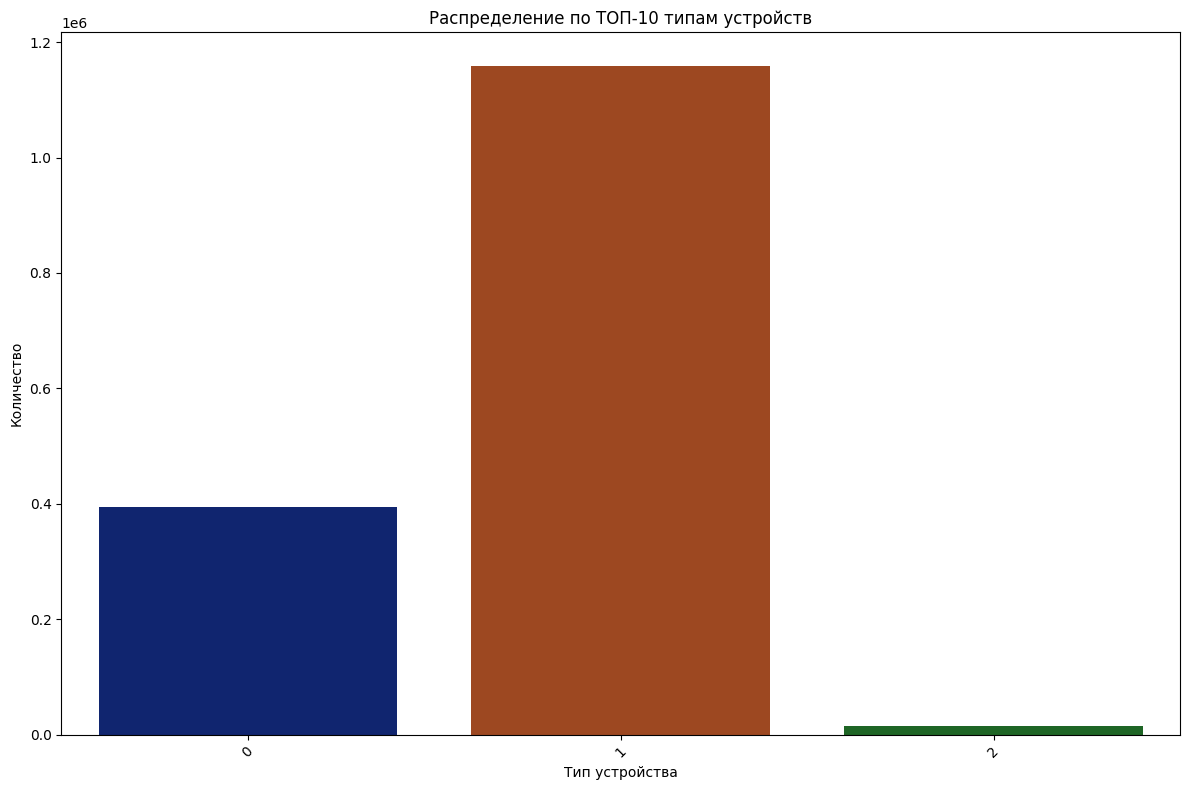

In [67]:
# Распределение по типам устройств
top_device_category = top_ten_categories(df_sample, 'device_category', n=10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_device_category.index, y=top_device_category.values, palette='dark')
plt.title('Распределение по ТОП-10 типам устройств')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.xlabel('Тип устройства')
plt.tight_layout()
plt.show()

#### Распределение по источникам трафика

<ipython-input-68-dd89ff2e923f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_utm_source.index, y=top_utm_source.values, palette='plasma')


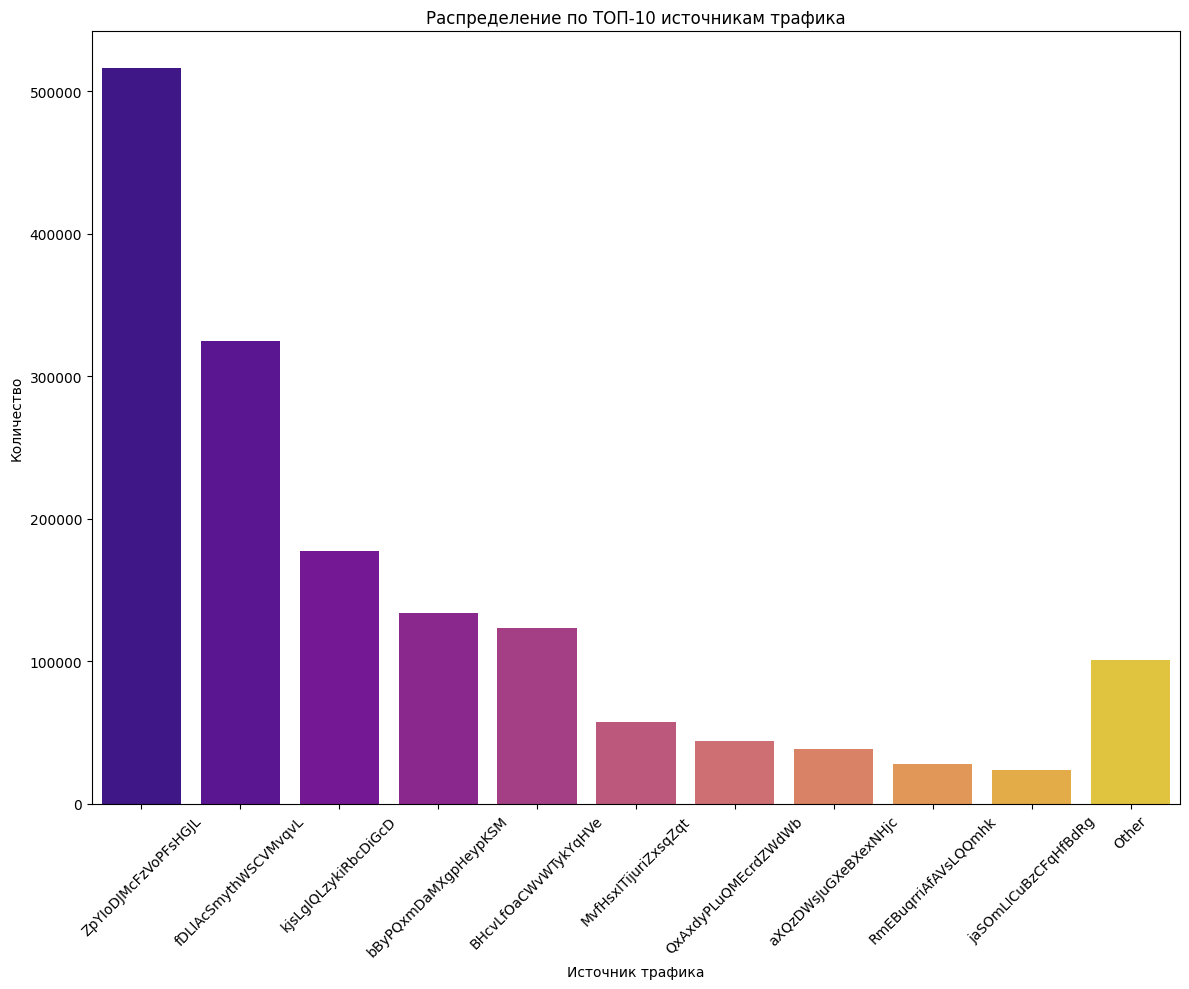

In [68]:
# Распределение по источникам трафика
top_utm_source = top_ten_categories(df_sample, 'utm_source', 10)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_utm_source.index, y=top_utm_source.values, palette='plasma')
plt.title('Распределение по ТОП-10 источникам трафика')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.xlabel('Источник трафика')
plt.tight_layout()
plt.show()

#### Распределение по событиям

<ipython-input-69-b213d2b19e4d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_utm_source.index, y=top_utm_source.values, palette='viridis')


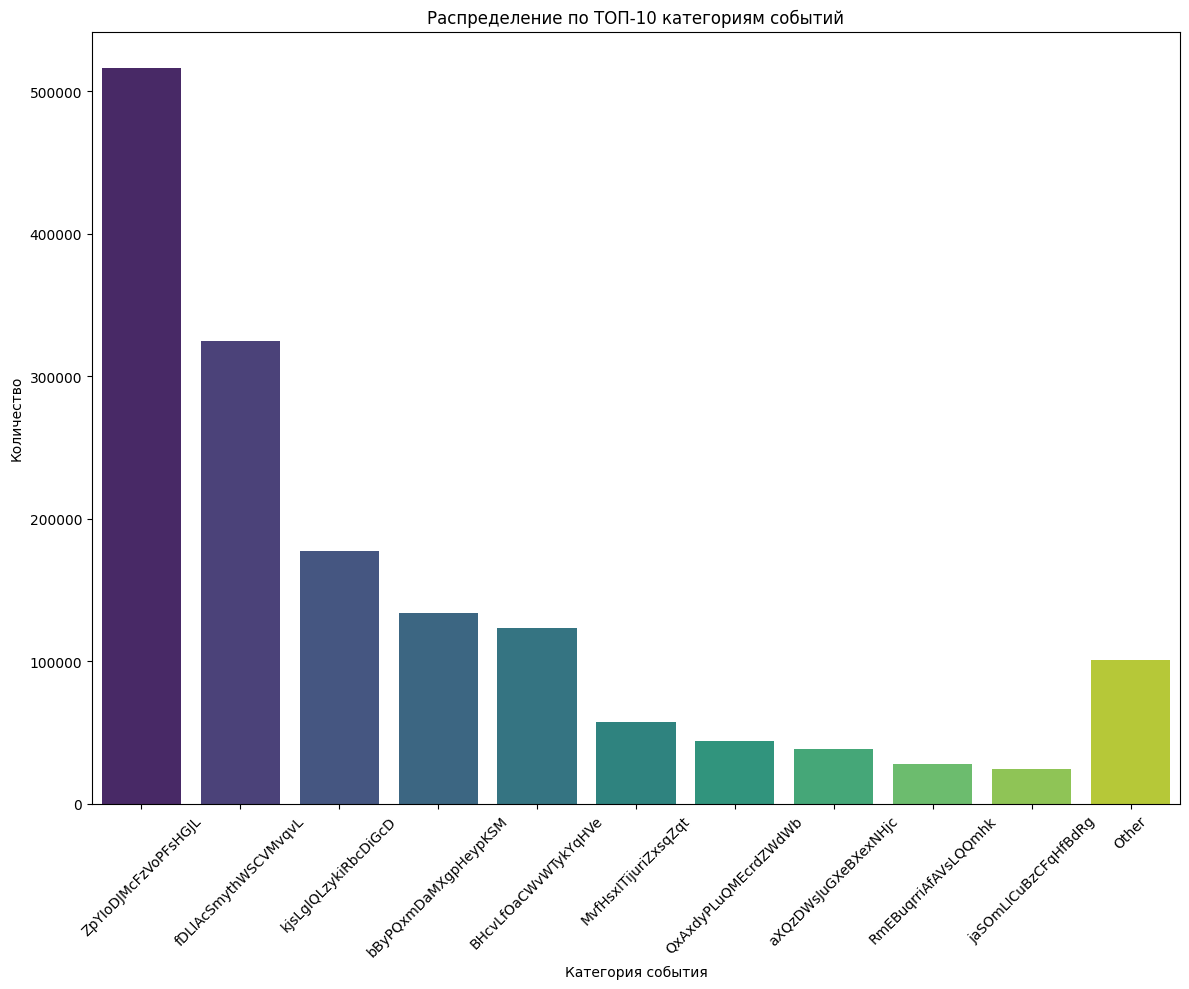

In [69]:
# Распределение по событиям
top_event_category = top_ten_categories(df_sample, 'event_category', 10)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_utm_source.index, y=top_utm_source.values, palette='viridis')
plt.title('Распределение по ТОП-10 категориям событий')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.xlabel('Категория события')
plt.tight_layout()
plt.show()

... а можно построить сразу много

#### Множественные графики

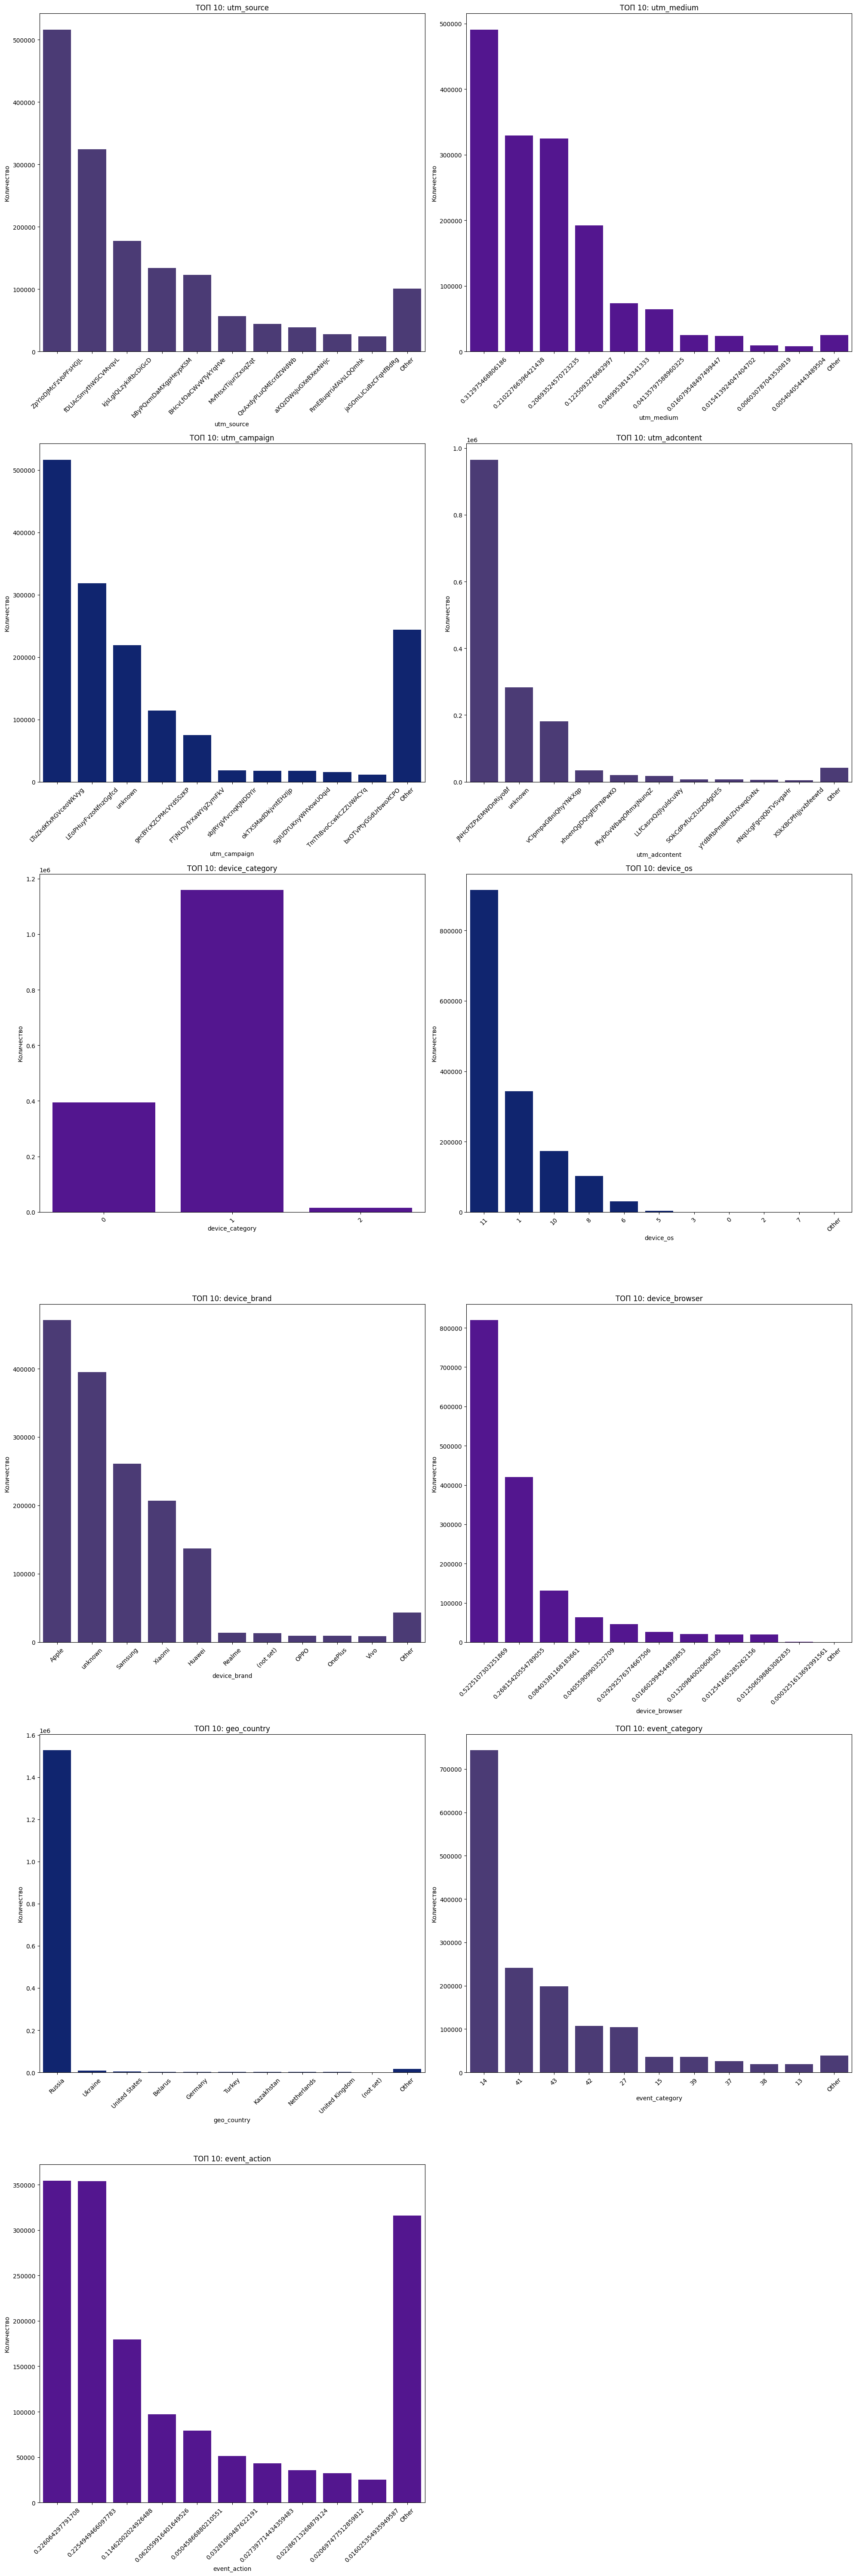

In [70]:
# Алгоритм для построения графиков по признакам
categorical_cols = [ 'utm_source',
           'utm_medium',
            'utm_campaign',
            'utm_adcontent',
            'device_category',
            'device_os',
            'device_brand',
            'device_browser',
            'geo_country',
            'event_category',
            'event_action'
]

palettes = ['viridis', 'plasma', 'dark']

fig, axs = plt.subplots(
    nrows=(len(categorical_cols) + 1) // 2,
    ncols=2,
    figsize=(20, 10 * ((len(categorical_cols) + 1) // 2))
)
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    top = top_ten_categories(df_sample, col, n=10)
    color = sns.color_palette(palettes[i % len(palettes)])[0]
    sns.barplot(
        x=top.index,
        y=top.values,
        color=color,
        ax=axs[i]
    )
    axs[i].set_title(f'ТОП 10: {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Количество')
    axs[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### Боксплоты

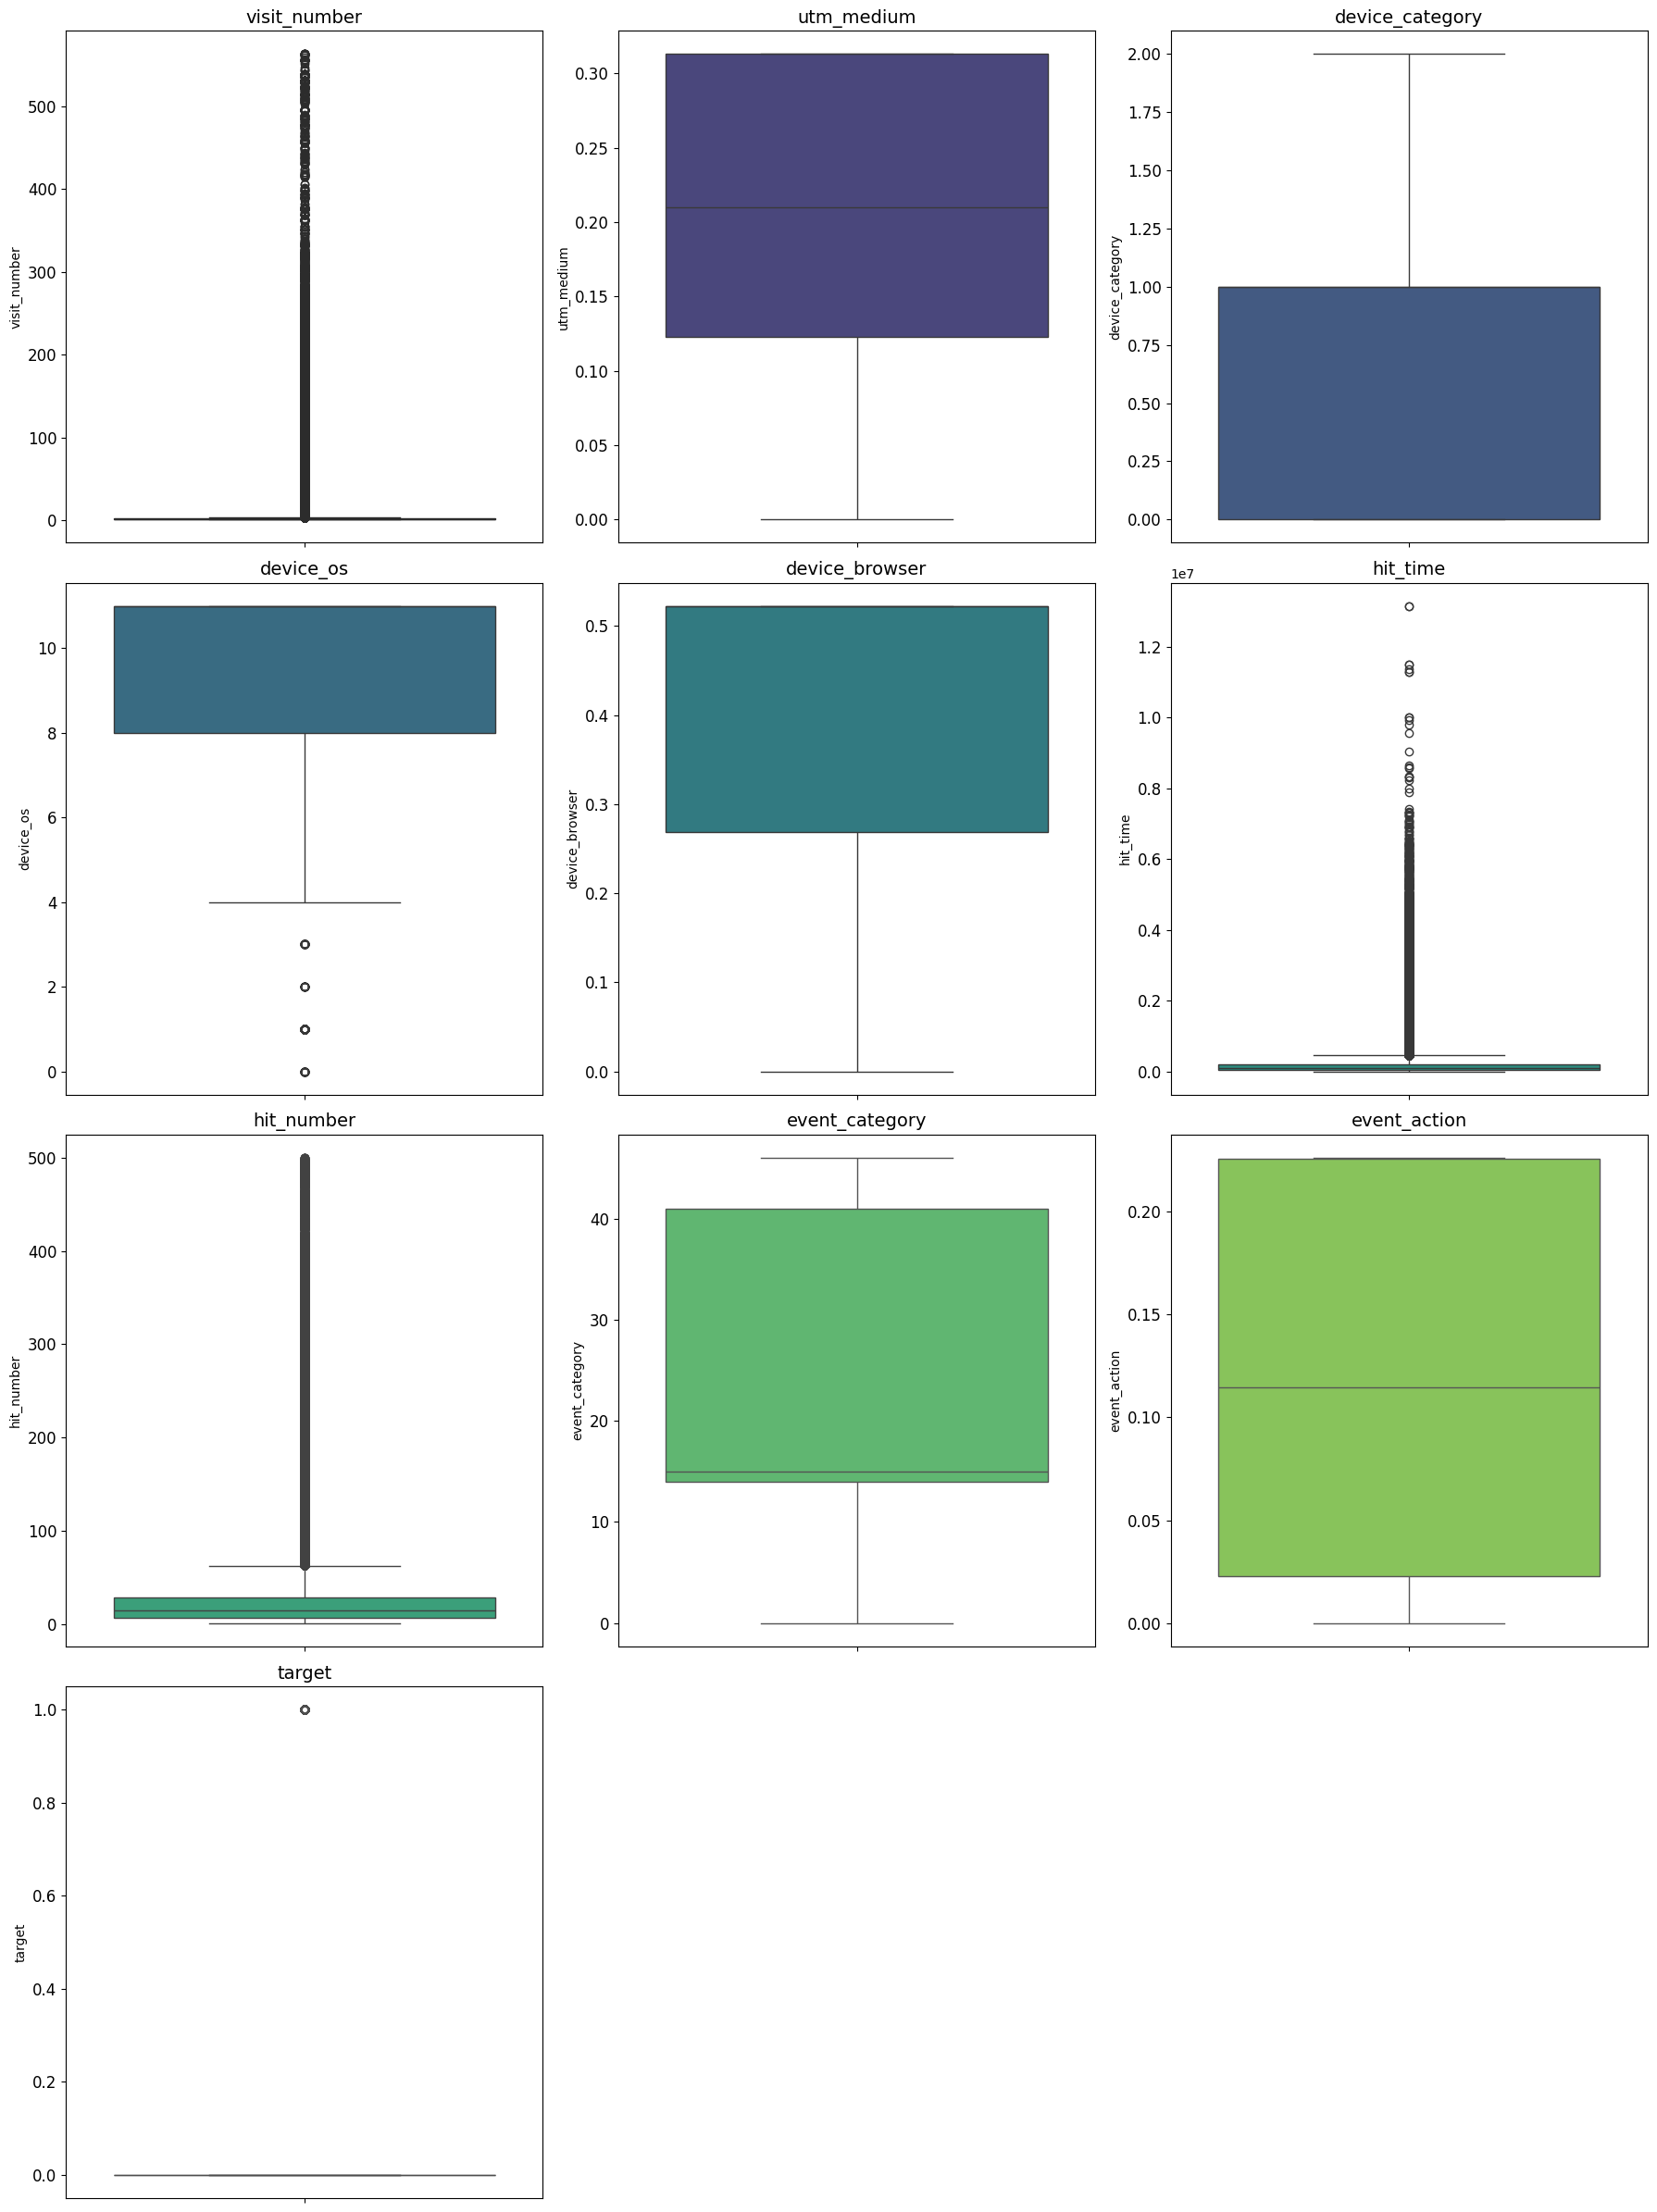

In [71]:
# boxplot's
import math

numeric_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns
n = len(numeric_cols)
cols_per_row = 3
nrows = math.ceil(n / cols_per_row)

palette_name = 'viridis'
colors = sns.color_palette(palette_name, n)

fig, axs = plt.subplots(nrows, cols_per_row, figsize=(6*cols_per_row, 6*nrows))

axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_sample[col], ax=axs[i], color=colors[i])
    axs[i].set_title(col, fontsize=14)
    axs[i].tick_params(axis='y', labelsize=12)

for j in range(i+1, nrows*cols_per_row):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### Корелляция

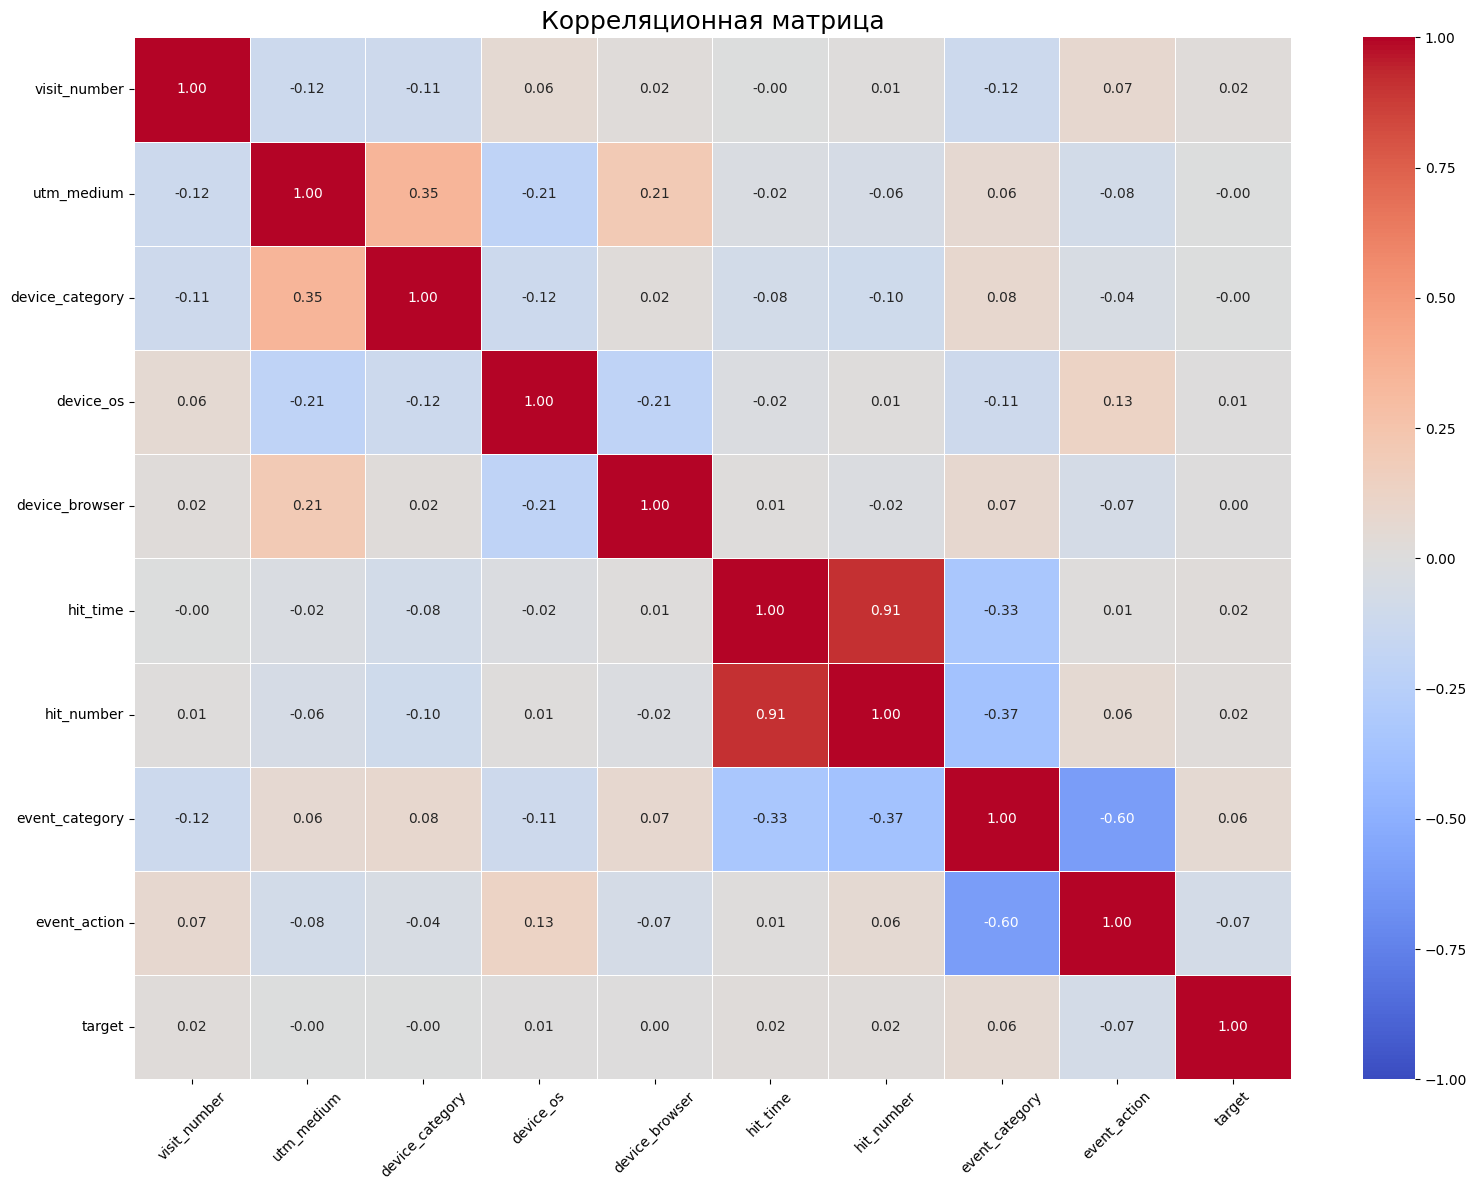

In [72]:
numeric_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df_sample[numeric_cols].corr(method='spearman')

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            linewidths=.5,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title('Корреляционная матрица', fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Конверсия по дням недели и часам

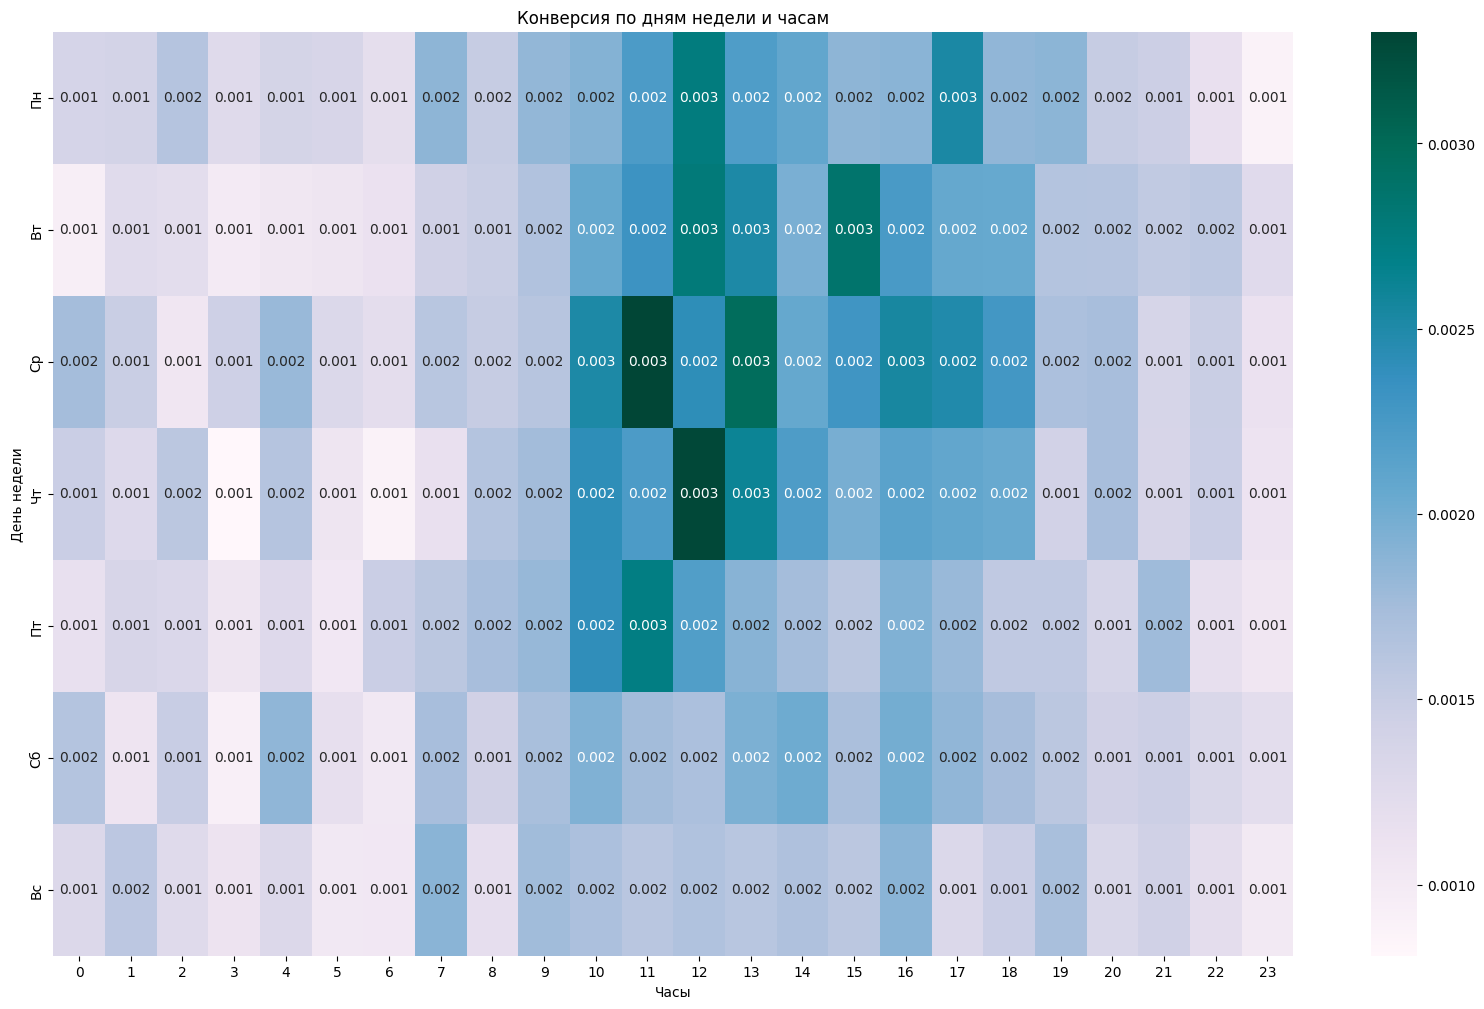

In [73]:
df_merge_copy["hour"] = df_merge_copy["datetime"].dt.hour
df_merge_copy["weekday"] = df_merge_copy["datetime"].dt.weekday
heatmap_data = df_merge_copy.groupby(["weekday", "hour"])["target"].mean().unstack()
df_merge_copy.drop(["hour", "weekday"], axis=1, inplace=True)
heatmap_data.index = [['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'][i] for i in heatmap_data.index]
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, cmap="PuBuGn", annot=True, fmt=".3f")
plt.title("Конверсия по дням недели и часам")
plt.xlabel("Часы")
plt.ylabel("День недели")
plt.show()

## Результат предобработки датасетов
2 df:
 - df_merge (без обработки категориальных уникальных значений)
 - df_merge_copy (с обработкой категориальных уникальных значений)

-------

# Объединение категориальных признаков

1. Есть возможность объединять признаки по смыслу, есть по лексике
2. Искать признаки похожие по смыслу
3. Подсчитать уникальные значения
4. Не более 10 уникальных значений

In [74]:
#print(df_merge.nunique())

In [75]:
# from sentence_transformers import SentenceTransformer, util
# import pandas as pd
# from collections import Counterы

# def group_by_semantic_similarity(values, frequencies, model, threshold=0.75):
#     embeddings = model.encode(values, convert_to_tensor=True)
#     cosine_sim_matrix = util.cos_sim(embeddings, embeddings).cpu().numpy()
#     visited = set()
#     clusters = []
#     for i, value in enumerate(values):
#         if value in visited:
#             continue
#         cluster = [value]
#         visited.add(value)
#         for j, other_value in enumerate(values):
#             if other_value not in visited and cosine_sim_matrix[i][j] >= threshold:
#                 cluster.append(other_value)
#                 visited.add(other_value)
#         clusters.append(cluster)
#     mapping = {}
#     for cluster in clusters:
#         most_common = max(cluster, key=lambda v: frequencies.get(v, 0))
#         for val in cluster:
#             mapping[val] = most_common
#     return mapping

# def process_column(df, column_name, model, threshold=0.75, min_freq=10):
#     values = df[column_name].dropna()
#     freq_counter = Counter(values)
#     filtered_values = [v for v in freq_counter if freq_counter[v] >= min_freq]
#     mapping = group_by_semantic_similarity(filtered_values, freq_counter, model, threshold)
#     df[column_name + '_grouped'] = df[column_name].map(mapping).fillna(df[column_name])
#     return df, mapping

# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# columns_to_group = ['utm_campaign', 'utm_keyword', 'device_model', 'geo_city', 'event_action', 'event_label']
# for col in columns_to_group:
#     df, mapping = process_column(df, col, model)

# Обучение модели

In [76]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.2 MB/s eta 0:00:00


In [77]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [78]:
# Построение целевого признака по релевантным действиям
target_actions = [
    "form_request_call_sent",
    "callback requested",
    "sub_submit_success",
    "sub_callback_submit_click",
    "click_on_request_call",
    "click_free_car_selection",
    "click_buy_auto",
    "user gave contacts during chat",
    "chat requested",
    "client initiate chat",
    "success_ad_creation",
    "sub_car_request_submit_click",
    "sub_custom_question_submit_click"
]

# Создание бинарного таргета
df_merge["target"] = df_merge["event_action"].isin(target_actions).astype(int)
df_merge["target"].value_counts()

,count
target,
0,15656382
1,28137


In [ ]:
# Признаки, используемые в обучении модели
features = [
    'visit_number',
    'utm_source',
    'utm_medium',
    'utm_campaign',
    'utm_adcontent',
    'utm_keyword',
    'device_category',
    'device_os',
    'device_brand',
    'device_screen_resolution',
    'device_browser',
    'geo_country',
    'geo_city',
    'hit_time',
    'hit_number',
]

df_merge_feat = df_merge[features + ['target']].dropna()

X = df_merge_feat[features]
y = df_merge_feat['target']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_features:
    X.loc[:, col] = X[col].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [ ]:
# cat = CatBoostClassifier(
#     cat_features=cat_features,
#     eval_metric="AUC",
#     verbose=0,
#     random_state=42,
# )

# # Параметры для подбора
# param_dist = {
#     "depth": [3, 4, 5, 6],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "iterations": [100, 200, 300],
#     "l2_leaf_reg": [1, 3, 5, 7],
#     "border_count": [32, 64, 128],
#     "random_strength": [1, 5, 10],
#     "bagging_temperature": [0.1, 0.5, 1],
#     "scale_pos_weight": [1, 3, 5]  # балансировка классов
# }

# # Поиск
# search = RandomizedSearchCV(
#     cat,
#     param_distributions=param_dist,
#     n_iter=25,
#     scoring="roc_auc",
#     cv=3,
#     random_state=42,
#     n_jobs=-1
# )

# #search.fit(X_train, y_train)
# print("Лучшие параметры:")
# print(search.best_params_)
# print(f"Лучшее AUC: {search.best_score_:.4f}")

In [ ]:
#best_params = search.best_params_
best_params = {'scale_pos_weight': 3, 'random_strength': 1, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 4, 'border_count': 128, 'bagging_temperature': 0.1}

model = CatBoostClassifier(
    **best_params,
    cat_features=cat_features,
    eval_metric="AUC",
    verbose=100,
    random_state=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred_proba = model.predict_proba(X_test)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")